<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Turkey_data.csv")

In [69]:
df.shape

(536, 8)

In [68]:
df.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.038376
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.031813
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.026353
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.084716
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658


In [70]:
df.sample(n = 10)

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
94,-0.006883,0.037813,0.004913,0.033289,-0.004245,0.017556,0.023405,0.061285
337,-0.032888,-0.008459,-0.015260,0.000000,-0.023379,-0.017706,-0.013554,-0.024922
139,-0.000534,0.005402,0.002786,0.007343,-0.003029,0.002757,-0.004710,0.009434
402,-0.003711,-0.011745,-0.006244,-0.001223,-0.004644,-0.010200,-0.001846,0.005731
232,-0.010304,-0.016764,-0.016633,-0.002672,-0.011494,-0.015215,-0.006007,-0.008669
466,-0.004251,0.000531,-0.000292,0.003142,-0.006203,-0.003419,-0.007653,-0.011877
444,0.006104,0.002454,-0.000795,-0.009955,0.012663,-0.000716,0.000977,0.000196
34,-0.011479,-0.048747,-0.032706,-0.018869,-0.025879,-0.037924,-0.027294,-0.049776
513,0.002411,0.005416,0.004828,-0.015720,-0.006186,0.008396,-0.006854,-0.000511
344,0.001109,0.001684,-0.000076,-0.021911,-0.008648,-0.000552,-0.013754,-0.003440


KeyError: ignored

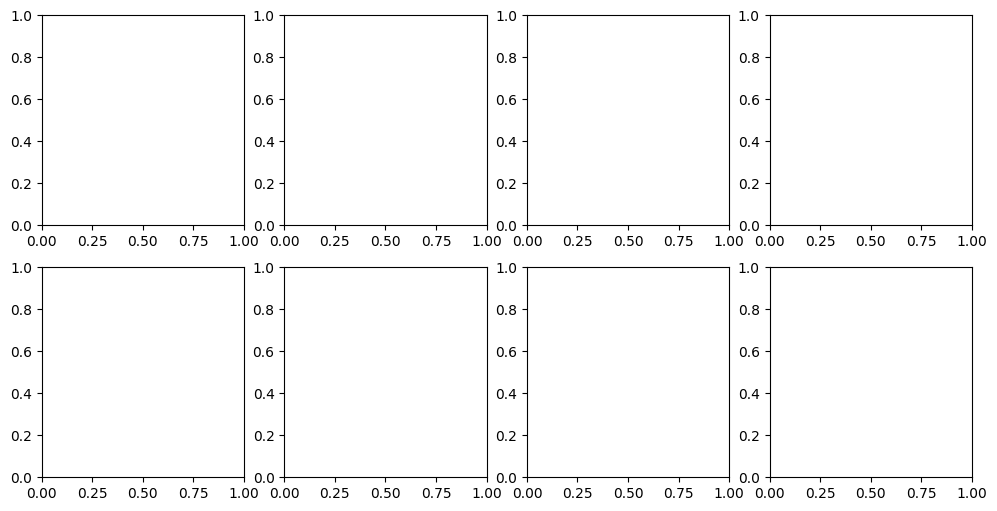

In [80]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,6))

# plot data for each column
for i, col in enumerate(df.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.plot(df[col])
    ax.set_title(col)
    ax.grid(True)

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# show plot
plt.show()



**Correlation between different variables**

In [73]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='ISE', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['ISE'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 ISE        1
EM         2
EU         3
FTSE       4
DAX        5
SP         6
BOVESPA    7
NIKKEI     8
Name: ISE, dtype: int64


**Drawing the heatmap**

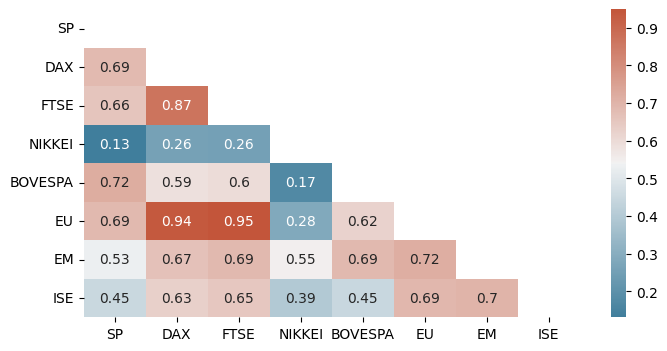

In [78]:
import seaborn as sns

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['ISE'], axis=1), 
                                                    df['ISE'], 
                                                    test_size=0.25, 
                                                    random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed for reproducibility
# np.random.seed(11)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Train the model with validation data
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.0346 - val_loss: 0.0158
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0070
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 8.2691e-04 - val_loss: 0.0015
Epoc

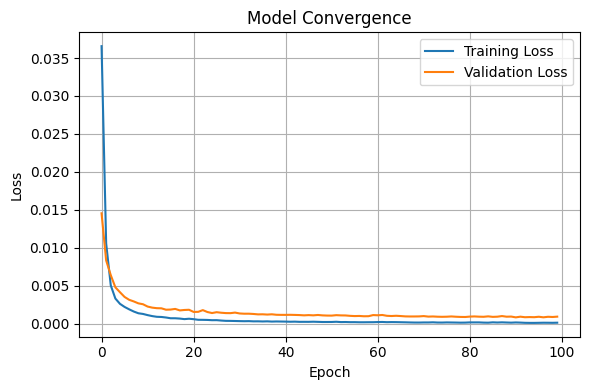

In [59]:
# Plot the convergence curve for training and validation
fig = plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('CNN_convergence.png')

In [60]:
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate predictions for both training and testing datasets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the MSE, R-squared, MAE, VAF, and RMSE for both training and testing datasets
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

train_diff = np.subtract(y_train, np.var(train_pred, axis=0))
test_diff = np.subtract(y_test, np.var(test_pred, axis=0))

train_vaf = 1 - np.var(train_diff, axis=0) / np.var(y_train, axis=0)*100
test_vaf = 1 - np.var(test_diff, axis=0) / np.var(y_test, axis=0)*100

# Create a table to display the results
results = pd.DataFrame({
    'Metric': ['MSE', 'R-squared', 'MAE', 'VAF', 'RMSE'],
    'Training Set': [train_mse, train_r2, train_mae, train_vaf, train_rmse],
    'Testing Set': [test_mse, test_r2, test_mae, test_vaf, test_rmse]
})

print(results)

5/5 [==============================] - 0s 2ms/step
      Metric  Training Set  Testing Set
0        MSE      0.000140     0.000927
1  R-squared      0.660602    -0.743172
2        MAE      0.009039     0.022693
3        VAF    -99.000000   -99.000000
4       RMSE      0.011852     0.030447


5/5 [==============================] - 0s 5ms/step


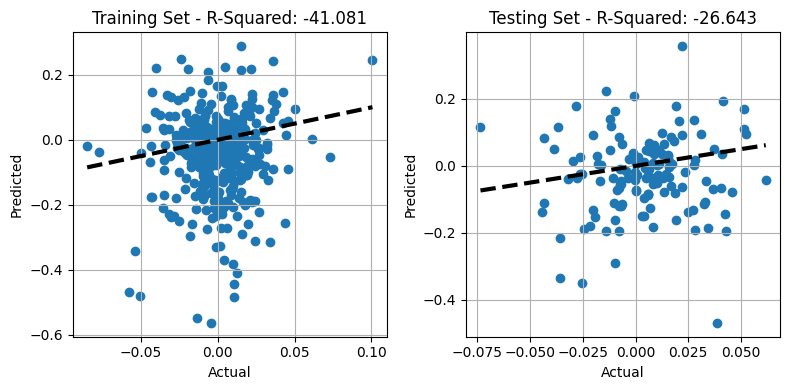

In [85]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(y_train, train_pred, label='Training')
ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Training Set - R-Squared: {:.3f}'.format(r2_score(y_train, train_pred)))
ax1.grid(True)

ax2.scatter(y_test, test_pred, label='Testing')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Testing Set - R-Squared: {:.3f}'.format(r2_score(y_test, test_pred)))
ax2.grid(True)

plt.tight_layout()
plt.show()
# Save the figure
fig.savefig('Correlation.png')


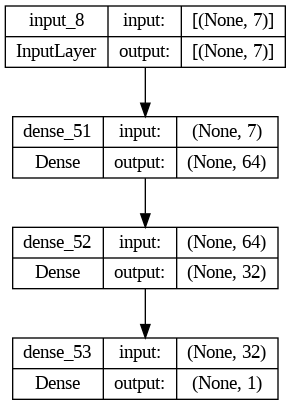

In [82]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = X_train.shape[1]

# Define the model architecture
inputs = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [65]:
# Save the model
model.save('CNN_model_Turkey.h5')

In [66]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')